# Assignment 5

Assume you work for a record company. Your boss is interested in predicting ablum sales based on advertising. You are provided with the data in a file (*album_sales.csv*). 

There are 200 rows, where each row represents an album. There are also four columns. The first (*sales*) represents the sales of each album (in thousands) the week after release. The second (adverts) represents the amount (in thousands $) spent promoting the album prior to its release. The third (*airplay*) represents how many times it played on the radio. The fourth column (*attract*) represents the attractiveness of the band. 

## Instructions

### 1. Visualization (15 points)

Visualizing data is important to get a 'feel' of what the relationship between variables could be. For this part, **display the scatterplots between the following variables**.

- *sales* and *adverts*
- *sales* and *airplay*
- *sales* and *attract*

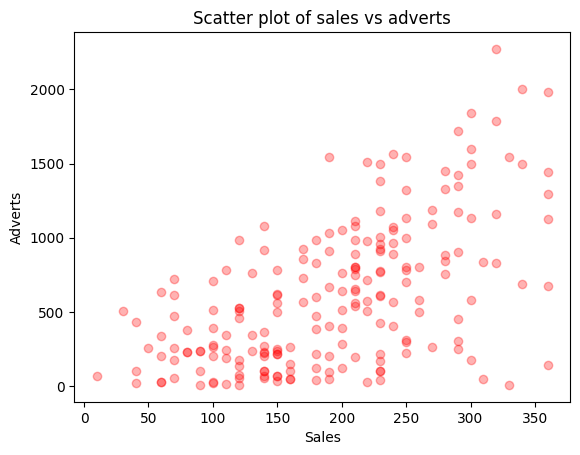

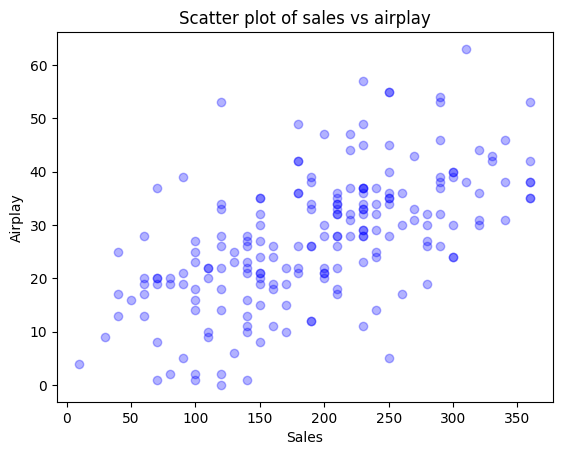

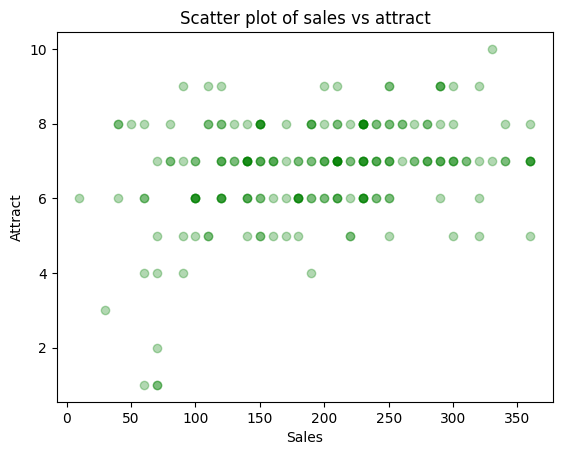

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv('album_sales.csv')

# Create a scatter plot
plt.scatter(df.sales, df.adverts, color = 'red', alpha = 0.3)
plt.title('Scatter plot of sales vs adverts')
plt.xlabel('Sales')
plt.ylabel('Adverts')
plt.show()

plt.scatter(df.sales, df.airplay, color = 'blue', alpha = 0.3)
plt.title('Scatter plot of sales vs airplay')
plt.xlabel('Sales')
plt.ylabel('Airplay')
plt.show()

plt.scatter(df.sales, df.attract, color = 'green', alpha = 0.3)
plt.title('Scatter plot of sales vs attract')
plt.xlabel('Sales')
plt.ylabel('Attract')
plt.show()

In the empty `Markdown` cell below, describe the relationship (or lack thereof) portrayed by the scatterplots you generated. 

For the first two it appears that there is a little bit of a relation ship showing that as Adverts/Airplay increase that sales also increase.
Where as the third one does not seem to have a relationship at all since as the Attract increases the sales don't increase.

### 2. Linear Regression (35 points)

- Conduct a linear regression to construct a linear model between *sales* and *adverts*
- Display the **F-statistic** and **P-value**
    - Use the `statsmodels.api` module for this -- may need to install via `pip`
    - Note that **X**, your predictor(s), will consist of *adverts* and that **y**, your constant, will consist of *sales*
    - The values you need can be accessed via the `summary()` function of your model object

In [18]:
print(sm.OLS(df.adverts, df.sales).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                adverts   R-squared (uncentered):                   0.744
Model:                            OLS   Adj. R-squared (uncentered):              0.743
Method:                 Least Squares   F-statistic:                              578.7
Date:                Fri, 20 Sep 2024   Prob (F-statistic):                    8.23e-61
Time:                        15:34:26   Log-Likelihood:                         -1480.0
No. Observations:                 200   AIC:                                      2962.
Df Residuals:                     199   BIC:                                      2965.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In the empty `Markdown` cell below, describe whether the **F-statistic** and **P-value** describe about our linear regression model. (I.e., Is it good? Bad? No bearing?)

Based on the F-Statistic and the P-Value it seems that there is some relationship between the two and that you can predict the Sales based upon the Adverts with a 74.4% accuracy.

### 3. Model Coefficients (10 points)

- Make note of the **intercept** value and **coefficient** (adverts) value of your linear regression model. 

The regression line is described using this equation: *Y = b<sub>0</sub> + b<sub>1</sub>X<sub>1</sub>* where each variable represents the following:

- Y denotes the sales
- *b<sub>0</sub>* denotes the **intercept** value
- *b<sub>1</sub>* denotes the advertising budget **coefficient**
- *X<sub>2</sub>* denotes the advertising budget

The equation then becomes *Album Sales = intercept value + (coefficient * advertising budget)*. 

Using the intercept value and coefficient of your linear model, **calculate and display how many records will be sold if $135,000 was spent on advertising an album**.

Predicted album sales for $135,000 advertising budget: 13110.945544285487


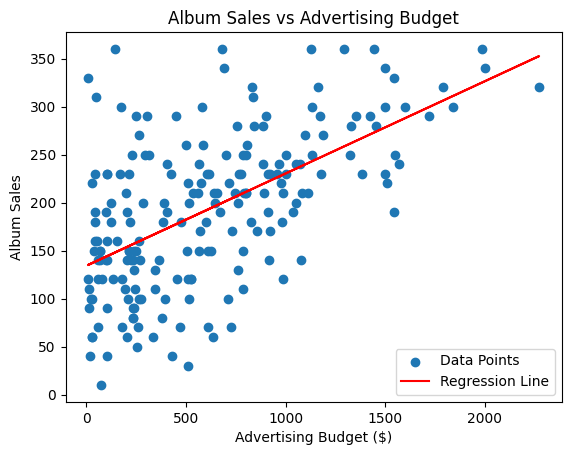

In [19]:
# Prepare the independent (X) and dependent (y) variables
X = df['adverts']  # Advertising budget
y = df['sales']    # Album sales

# Step 4: Add a constant to the independent variable (for the intercept in statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Make predictions using the fitted model
ad_budget = 135000  # Advertising budget for prediction
X_new = np.array([1, ad_budget])  # Adding 1 for the intercept term
predicted_sales = model.predict(X_new)

print(f"Predicted album sales for $135,000 advertising budget: {predicted_sales[0]}")

# Visualize the relationship
plt.scatter(df['adverts'], df['sales'], label='Data Points')
plt.plot(df['adverts'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Advertising Budget ($)')
plt.ylabel('Album Sales')
plt.title('Album Sales vs Advertising Budget')
plt.legend()
plt.show()

### 4. Multiple Regression (40 points)
- Conduct a **multiple regression** to construct a model between *sales* and the predictors (*adverts*, *airplay*, and *attract*)
    - Note that **X**, your predictors will consist of *adverts*, *airplay*, and *attractiveness*, and **y**, your constant, will consist of *sales*
- Display the summary of the multiple regression model using the `summary()` function to obtain the relevant values

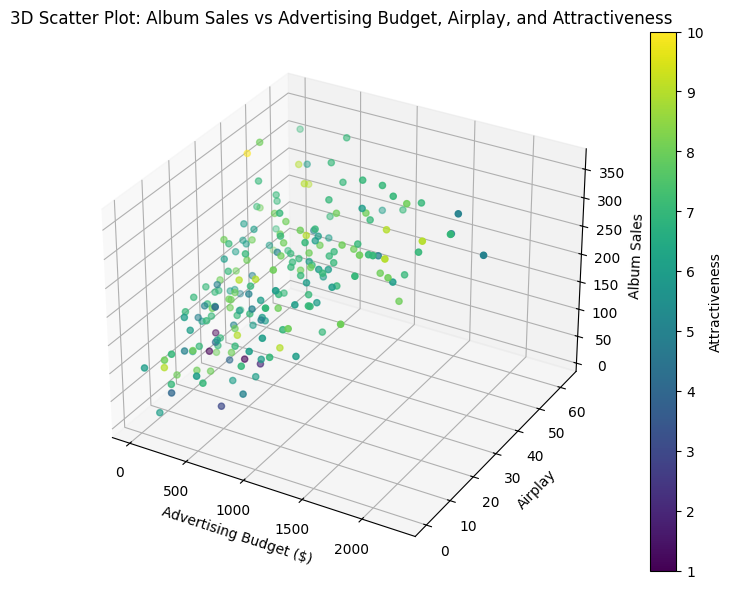

In [20]:
# I was able to plot it all out using multiple scatter plots.
# But I wanted to see all of it in one single plot.
# I used chatGPT to help me with the code below.

from mpl_toolkits.mplot3d import Axes3D

# Step 1: Set up the figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Step 2: Define the data
x = df['adverts']      # Advertising Budget (X-axis)
y = df['airplay']      # Airplay (Y-axis)
z = df['sales']        # Album Sales (Z-axis)
c = df['attract']      # Attractiveness (color)

# Step 3: Create 3D scatter plot
sc = ax.scatter(x, y, z, c=c, cmap='viridis', label='Data Points')

# Step 4: Add axis labels
ax.set_xlabel('Advertising Budget ($)')
ax.set_ylabel('Airplay')
ax.set_zlabel('Album Sales')

# Step 5: Add color bar to show attractiveness score
colorbar = fig.colorbar(sc)
colorbar.set_label('Attractiveness')

# Step 6: Add a title
plt.title('3D Scatter Plot: Album Sales vs Advertising Budget, Airplay, and Attractiveness')

# Show plot
plt.show()

We know that the R<sup>2</sup> (R-Squared) value can be used to evaluate the overall fit of a linear model. We also know that R<sup>2</sup> is between 0 and 1 -- higher values are better because it means that more variance is explained by the model. **Higher R<sup>2</sup> values are better if their P-values are < 0.05**.

Bsed on this, discuss **which one of the two models you constructed is better** in the empty `Markdown` cell below. 
* Model 1: The linear model between *sales* and *adverts* you constructed
* Model 2: The multiple regression model between (*sales*) and the predictors (*adverts*, *airplay*, and *attract*) you constructed

I think model 2 is better because you are able to visualize more factors that go into the data.

### Submission
- Submit this `Jupyter` file to D2L, renamed as **Last_First_Assignment4.ipynb** 
    - Replace '**Last**' and '**First**' with your first and last name